In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
%matplotlib inline

In [7]:
df = pd.read_csv('honey-crush-data.csv',)

In [8]:
df.head()

,time-1,force,time-2,displacement-m,displacement-mm,strain
0,2.830000e-07,0.0,0.00000,0.0,0.0,0.0
1,1.020000e-05,0.0,0.00001,0.0,0.0,0.0
2,2.010000e-05,0.0,0.00002,0.0,0.0,0.0
3,3.000000e-05,0.0,0.00003,0.0,0.0,0.0
4,4.030000e-05,0.0,0.00004,0.0,0.0,0.0


In [9]:
df.describe()

,time-1,force,time-2,displacement-m,displacement-mm,strain
count,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000
mean,2.500003e-03,1646.846307,0.002500,-0.002831,2.831016,0.070775
std,1.447700e-03,851.653940,0.001448,0.001877,1.876876,0.046922
min,2.830000e-07,0.000000,0.000000,-0.006050,0.000000,0.000000
25%,1.250000e-03,1450.000000,0.001250,-0.004470,1.165300,0.029132
50%,2.500000e-03,1570.000000,0.002500,-0.002840,2.841200,0.071030
75%,3.750000e-03,1840.000000,0.003750,-0.001170,4.467800,0.111695
max,5.000000e-03,6740.000000,0.005000,0.000000,6.047200,0.151180


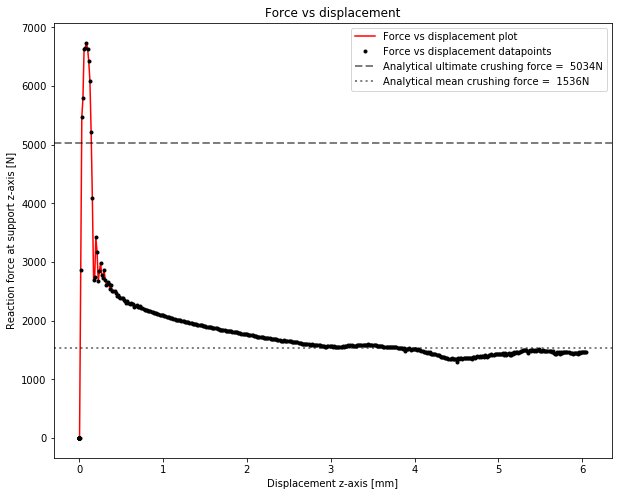

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df['displacement-mm'],df['force'],'r',lw=1.5,label="Force vs displacement plot")
plt.plot(df['displacement-mm'],df['force'],'ko', markersize=3,label="Force vs displacement datapoints")
plt.axhline(5034,color='black',alpha=0.5,linestyle='--',lw=2,label='Analytical ultimate crushing force =  5034N')
plt.axhline(1536,color='black',alpha=0.5,linestyle=':',lw=2,label='Analytical mean crushing force =  1536N')
plt.title('Force vs displacement')
plt.ylabel('Reaction force at support z-axis [N]')
plt.xlabel('Displacement z-axis [mm]')
plt.legend()
plt.show()

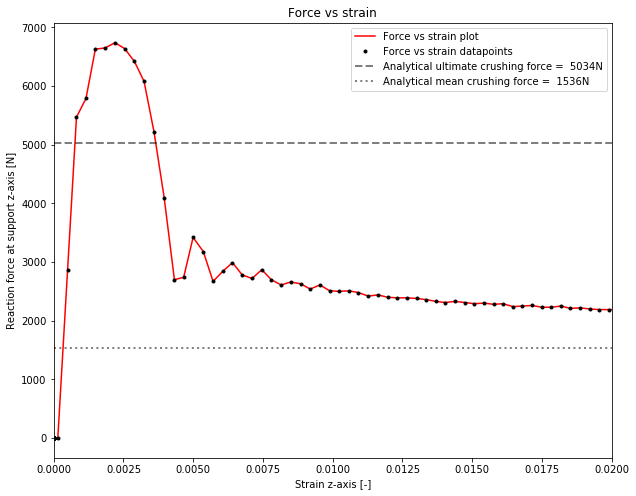

In [11]:
plt.figure(figsize=(10,8))
plt.plot(df['strain'],df['force'],'r',lw=1.5,label="Force vs strain plot")
plt.plot(df['strain'],df['force'],'ko', markersize=3,label="Force vs strain datapoints")
plt.axhline(5034,color='black',alpha=0.5,linestyle='--',lw=2,label='Analytical ultimate crushing force =  5034N')
plt.axhline(1536,color='black',alpha=0.5,linestyle=':',lw=2,label='Analytical mean crushing force =  1536N')
plt.title('Force vs strain')
plt.ylabel('Reaction force at support z-axis [N]')
plt.xlabel('Strain z-axis [-]')
plt.xlim((0,0.02))
plt.legend()
plt.show()

In [12]:
def virtual_length(d, alfa):
    L = 2 * d * (1 + math.cos(alfa / 2))
    return L

def virtual_width(d, alfa, t_c):
    W = 2 * (t_c + d *math.sin(alfa / 2))
    return W

def virtual_area(L,W):
    A = L * W
    return A

In [13]:
def mean_crushing(A, sigma, t_c, S):
    P_mean = 16.54 * A * sigma * (t_c / S) ** (5/3)
    return P_mean

def ultimate_crushing(sigma, t_c, d, v, E):
    part_1 = (t_c / d) ** 2
    part_2 = 3 * (1 - v ** 2)
    part_3 = math.pi ** 2 * E * sigma ** 2
    combine = ((part_3 / part_2) * part_1) ** (1/3)
    P_ultimate = 8 * d * t_c * combine
    return P_ultimate

In [14]:
d = 0.0096
S = 0.0166
sigma = 8.96e7
alfa = (2 * math.pi / 3)
t_c = 7.6e-5
n = 17
E = 7.03e10
v = 0.33

L = virtual_length(d,alfa)
W = virtual_width(d,alfa,t_c)
A = virtual_area(L,W)
P_m = mean_crushing(A,sigma,t_c,S)
P_u = ultimate_crushing(sigma,t_c,d,v,E)

print("Mean crushing force for 1 cell = {:.2f}N, and for {} cells = {:.2f}N".
     format(P_m,n,(P_m*n)))
print("Ultimate crushing force for 1 cell = {:.2f}N, and for {} cells = {:.2f}N".
     format(P_u,n,(P_u*n)))

Mean crushing force for 1 cell = 90.41N, and for 17 cells = 1536.90N
Ultimate crushing force for 1 cell = 296.13N, and for 17 cells = 5034.15N
